In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import QUANTAXIS as QA

In [23]:
## load data function
def load_data(stock, seq_len):
    # stock 是一个input的dataframe
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [10]:
data=QA.QA_fetch_stock_day_adv('000001','2000-01-01','2018-01-31').to_qfq()

In [14]:
data.plot()

QUANTAXIS>> The Pic has been saved to your path: .\QA_stock_day_codepackage_qfq.html


In [21]:
used_data=pd.concat([data.open,data.high,data.close],axis=1)

In [25]:
window = 5
X_train, y_train, X_test, y_test = load_data(used_data[::-1], window)

In [27]:
X_train

array([[[13.6       , 14.05      , 14.05      ],
        [13.7       , 13.84      , 13.65      ],
        [14.05      , 14.25      , 13.74      ],
        [14.18      , 14.34      , 14.05      ],
        [14.45      , 14.47      , 14.2       ]],

       [[13.7       , 13.84      , 13.65      ],
        [14.05      , 14.25      , 13.74      ],
        [14.18      , 14.34      , 14.05      ],
        [14.45      , 14.47      , 14.2       ],
        [14.66      , 15.08      , 14.64      ]],

       [[14.05      , 14.25      , 13.74      ],
        [14.18      , 14.34      , 14.05      ],
        [14.45      , 14.47      , 14.2       ],
        [14.66      , 15.08      , 14.64      ],
        [14.36      , 14.9       , 14.65      ]],

       ...,

       [[ 3.19328644,  3.23457894,  3.18640436],
        [ 3.16117005,  3.21163866,  3.18869838],
        [ 3.21163866,  3.23228491,  3.16117005],
        [ 3.28734157,  3.32634004,  3.23687296],
        [ 3.23228491,  3.23228491,  3.23228491]],


In [28]:
model = build_model2([3,window,1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`


In [29]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=500,
    validation_split=0.1,
    verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [30]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    #print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))

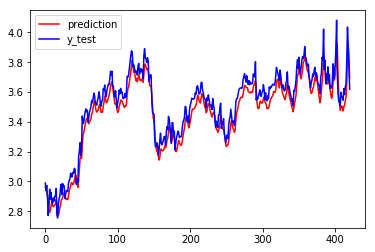

In [31]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()